# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [403]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 
pd.DataFrame(dataset).head(15)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [404]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,449,91,39,82,164,68,10,143,46,19,137,164,308,158,68,13,9,191,201
1,447,95,57,104,228,74,10,212,31,24,175,224,670,223,74,0,4,186,193
2,650,98,55,104,213,67,9,206,32,23,167,223,629,220,72,5,19,187,196
3,237,85,45,65,128,56,8,151,45,19,145,170,332,186,81,1,10,179,184
4,314,90,42,63,126,55,7,152,45,19,142,173,336,173,81,0,15,180,184
5,227,94,35,66,147,62,9,131,50,18,127,159,258,115,66,8,7,196,201
6,630,86,40,63,135,56,5,133,50,18,135,152,262,166,70,9,2,187,191
7,438,91,49,86,195,63,8,177,37,21,156,203,473,201,67,7,5,192,198
8,579,84,38,66,138,62,6,126,54,18,132,144,232,139,70,4,7,185,190
9,114,93,43,85,133,54,10,155,44,19,153,174,351,165,75,12,13,184,196


Methods `describe` and `info` deliver some useful information.

In [405]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,418.978142,93.613843,44.748634,81.812386,168.881603,61.632058,8.355191,168.588342,41.043716,20.566485,147.506375,188.300546,439.652095,174.347905,72.357013,6.251366,12.544627,189.071038,195.617486
std,242.003747,8.215853,6.284512,16.009673,33.944709,7.616693,4.231386,34.077439,7.989381,2.654298,14.634926,32.428062,181.320423,33.552730,7.536774,4.686390,8.963649,6.211631,7.559940
min,0.000000,77.000000,34.000000,42.000000,110.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,214.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,166.000000,314.000000,148.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,415.000000,93.000000,44.000000,78.000000,169.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,178.000000,362.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,630.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,200.000000,46.000000,23.000000,159.000000,217.000000,600.000000,199.000000,75.000000,9.000000,19.000000,194.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,333.000000,138.000000,52.000000,262.000000,59.000000,28.000000,186.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [406]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


In [407]:
X_test_pd = pd.DataFrame(X_test) 
X_test_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       297 non-null    int64
 1   1       297 non-null    int64
 2   2       297 non-null    int64
 3   3       297 non-null    int64
 4   4       297 non-null    int64
 5   5       297 non-null    int64
 6   6       297 non-null    int64
 7   7       297 non-null    int64
 8   8       297 non-null    int64
 9   9       297 non-null    int64
 10  10      297 non-null    int64
 11  11      297 non-null    int64
 12  12      297 non-null    int64
 13  13      297 non-null    int64
 14  14      297 non-null    int64
 15  15      297 non-null    int64
 16  16      297 non-null    int64
 17  17      297 non-null    int64
 18  18      297 non-null    int64
dtypes: int64(19)
memory usage: 44.2 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [408]:
import random
random.seed(42)

In [409]:
### YOUR CODE HERE 
#в наших данных нет значений null, значит заменять их не придется 
#также в наших данных нет категориальных признаков, значит преобразовывать их с помощью кодировки не нужно 
#единственное, что имеет смысл сделать, так это нормализовать данные.  
normalizer = preprocessing.StandardScaler() 
X_train_norm = normalizer.fit_transform(X_train)  
X_test_norm = normalizer.transform(X_test)
X_train_norm_pd = pd.DataFrame(X_train_norm) 
X_train_norm_pd.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.124168,-0.318436,-0.915565,0.011729,-0.143942,0.836813,0.389071,-0.751573,0.620925,-0.590707,-0.718552,-0.750051,-0.726736,-0.487675,-0.578628,1.441363,-0.395805,0.310824,0.712628
1,0.115897,0.168871,1.951232,1.387152,1.743197,1.625275,0.389071,1.275074,-1.258280,1.294748,1.880344,1.101885,1.271550,1.451341,0.218195,-1.335157,-0.954123,-0.494852,-0.346547
2,0.955492,0.534352,1.632699,1.387152,1.300899,0.705403,0.152526,1.098844,-1.132999,0.917657,1.333208,1.071020,1.045225,1.361848,-0.047413,-0.267265,0.720829,-0.333717,0.050644
3,-0.752650,-1.049398,0.040034,-1.051097,-1.205457,-0.740111,-0.084019,-0.516599,0.495644,-0.590707,-0.171416,-0.564858,-0.594253,0.347594,1.147821,-1.121579,-0.284142,-1.622798,-1.538118
4,-0.434183,-0.440263,-0.437765,-1.176135,-1.264430,-0.871521,-0.320563,-0.487228,0.495644,-0.590707,-0.376592,-0.472261,-0.572173,-0.040209,1.147821,-1.335157,0.274175,-1.461663,-1.538118
5,-0.794009,0.047044,-1.552630,-0.988578,-0.645213,0.048351,0.152526,-1.104033,1.122046,-0.967798,-1.402472,-0.904379,-1.002743,-1.770408,-0.844235,0.373471,-0.619132,1.116499,0.712628
6,0.872773,-0.927571,-0.756298,-1.176135,-0.999051,-0.740111,-0.793653,-1.045290,1.122046,-0.967798,-0.855336,-1.120439,-0.980662,-0.249026,-0.313020,0.587049,-1.177449,-0.333717,-0.611341
7,0.078673,-0.318436,0.677100,0.261806,0.770141,0.179762,-0.084019,0.247065,-0.506598,0.163475,0.580896,0.453708,0.184085,0.795059,-0.711431,0.159892,-0.842459,0.471959,0.315437
8,0.661840,-1.171225,-1.074831,-0.988578,-0.910592,0.048351,-0.557108,-1.250892,1.623167,-0.967798,-1.060512,-1.367363,-1.146266,-1.054464,-0.313020,-0.480843,-0.619132,-0.655987,-0.743737
9,-1.261370,-0.074783,-0.278499,0.199287,-1.058024,-1.002931,0.389071,-0.399113,0.370364,-0.590707,0.375720,-0.441395,-0.489371,-0.278858,0.350999,1.227785,0.050849,-0.817122,0.050644


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [410]:
### YOUR CODE HERE 
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score

logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42)  
grid_searcher = GridSearchCV(logreg, param_grid={'penalty':['l1', 'l2'], 'C' : np.logspace(-4, 4, 10)}, cv=3) 
grid_searcher.fit(X_train_norm, y_train) 
y_predicted = grid_searcher.predict(X_test_norm)  
y_predicted_proba = grid_searcher.predict_proba(X_test_norm)
score1 = accuracy_score(y_test, y_predicted)   
score2 = f1_score(y_test, y_predicted, average='micro')
print(score1) 
print(score2)  
print('Best params: ', grid_searcher.best_params_)

/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Convergen

0.7946127946127947
0.7946127946127947
Best params:  {'C': 21.54434690031882, 'penalty': 'l1'}


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

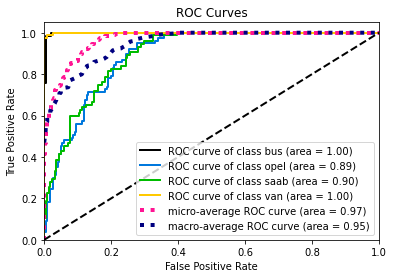

In [411]:
from scikitplot.metrics import plot_roc
plot_roc(y_test, y_predicted_proba)

In [412]:
#### 2.2. PCA: explained variance plot
### Apply the PCA to the train part of the data. Build the explaided variance plot. 

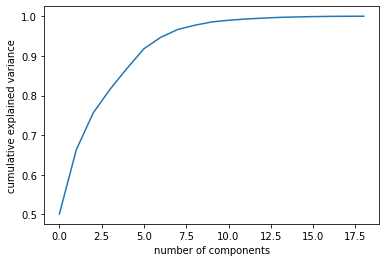

In [413]:
### YOUR CODE HERE 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca = PCA().fit(X_train_norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [414]:
# # 2.3. PCA trasformation
# * Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

# *Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [415]:
### YOUR CODE HERE
#Смотрим на график и видем, что начиная где-то с 12-13, вся информация содержится в 13 новых признаках, а дисперсия 
#вдоль остальных собственных векторов уже ничтожно мала, отсюда и находим оптимум 13 компонент. 
pca = PCA(n_components=13)
components = pca.fit_transform(X_train_norm)  
print(pca.explained_variance_ratio_)  
print(round(sum (pca.explained_variance_ratio_), 4)) 
#отсюда видно что мы потеряли информации меньше половины процента. 
#комментарий по поводу нормировки данных 
#нормировка обязательна, так как у нас собственные вектора ищутся из матрицы ковариации, а если данные будут 
#не нормированы, мы рискуем получить в разном масштабе собственные занчения, вследствии чего получить неправильно отношение 
#"значимости информации"

[0.5014566  0.1619817  0.09278678 0.05988787 0.05254234 0.04943331
 0.02896681 0.01956259 0.01066214 0.00823652 0.00430895 0.0031808
 0.00221594]
0.9952


In [416]:
# **Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

accuracy_score 0.7643097643097643
f1 score 0.7609316817746301


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

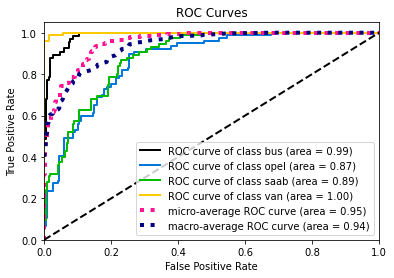

In [417]:
### YOUR CODE HERE 
from sklearn.pipeline import Pipeline 
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=2000)  
pipe = Pipeline(steps=[('pca', pca), ('log_reg', log_reg)]) 
parametrs = dict(log_reg__C=np.logspace(-4, 4, 20), log_reg__penalty=['l1', 'l2']) 

grid_searcher = GridSearchCV(pipe, parametrs, cv=3) 
grid_searcher.fit(X_train_norm, y_train)   

y_predicted = grid_searcher.predict(X_test_norm)  
y_predicted_proba = grid_searcher.predict_proba(X_test_norm)
print('accuracy_score', accuracy_score(y_test, y_predicted))  
print('f1 score', f1_score(y_test, y_predicted, average='macro'))  

plot_roc(y_test, y_predicted_proba)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [448]:
from sklearn.tree import DecisionTreeClassifier 
# YOUR CODE HERE

dts = DecisionTreeClassifier(max_features=None, random_state=42)
grid_searcher = GridSearchCV(dts, param_grid={'max_depth': np.arange(1, 15, 1)},
                             cv=5) 
grid_searcher.fit(X_train_norm, y_train) 
y_predicted = grid_searcher.predict(X_test_norm)   
y_predicted_train = grid_searcher.predict(X_train_norm)

print('Best params: ', grid_searcher.best_params_)

print('Print accuracy: ', accuracy_score(y_test, y_predicted))    
print('Print f1 score: ', f1_score(y_test, y_predicted, average='micro'))

Best params:  {'max_depth': 10}
Print accuracy:  0.696969696969697
Print f1 score:  0.696969696969697


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [454]:
# YOUR CODE HERE
idx = [i for i in range(X_train_norm.shape[0])] 
accuracy_log_n = np.zeros([100])  
accuracy_dtc_n = np.zeros([100]) 
f1_log_n = np.zeros([100])  
f1_dtc_n = np.zeros([100]) 
for j in range(100):  
    sidx = np.random.choice(idx, replace=True, size=X_train_norm.shape[0])  
    X_train_samp = X_train_norm[sidx,:] 
    y_train_samp = y_train[sidx] 
    #обучаем на этой выборке логистическую регрессию, дерево решений,
    #с помощью кросс валидации ищем оптимальные параметры 
    log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                                 max_iter=1000, C=21.54434690031882)  
    dtc = DecisionTreeClassifier(max_depth=10) 
    log_reg.fit(X_train_samp, y_train_samp) 
    dtc.fit(X_train_samp, y_train_samp) 
    y_predicted_log = log_reg.predict(X_test_norm) 
    y_predicted_dtc = dtc.predict(X_test_norm) 
    accuracy_log_n[j] = accuracy_score(y_test, y_predicted_log) 
    accuracy_dtc_n[j] = accuracy_score(y_test, y_predicted_dtc)   
    f1_log_n[j] = f1_score(y_test, y_predicted_log, average='macro')
    f1_dtc_n[j] = f1_score(y_test, y_predicted_dtc, average='macro')

In [455]:
ind_log = [k for k in range(accuracy_log_n.shape[0])]
ind_dtc = [k for k in range(accuracy_dtc_n.shape[0])] 

accuracy_log=np.zeros([len(np.arange(2, 100, 5))])  
accuracy_dtc=np.zeros([len(np.arange(2, 100, 5))])  
f1_log=np.zeros([len(np.arange(2, 100, 5))])  
f1_dtc=np.zeros([len(np.arange(2, 100, 5))])  
cnt = 0
for i in range(2, 100, 5): 
    indicies_log = np.random.choice(ind_log, replace=False, size=i)  
    indicies_dtc = np.random.choice(ind_dtc, replace=False, size=i)
    accuracy_log[cnt] = np.mean(accuracy_log_n[indicies_log]) 
    accuracy_dtc[cnt] = np.mean(accuracy_dtc_n[indicies_dtc])  
    f1_log[cnt] = np.mean(f1_log_n[indicies_log]) 
    f1_dtc[cnt] = np.mean(f1_dtc_n[indicies_dtc])
    cnt+=1

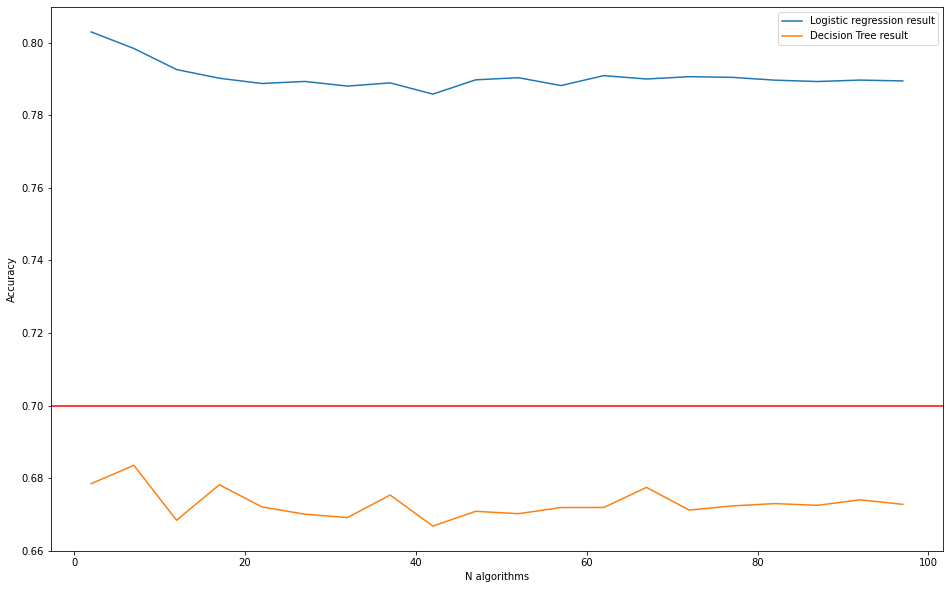

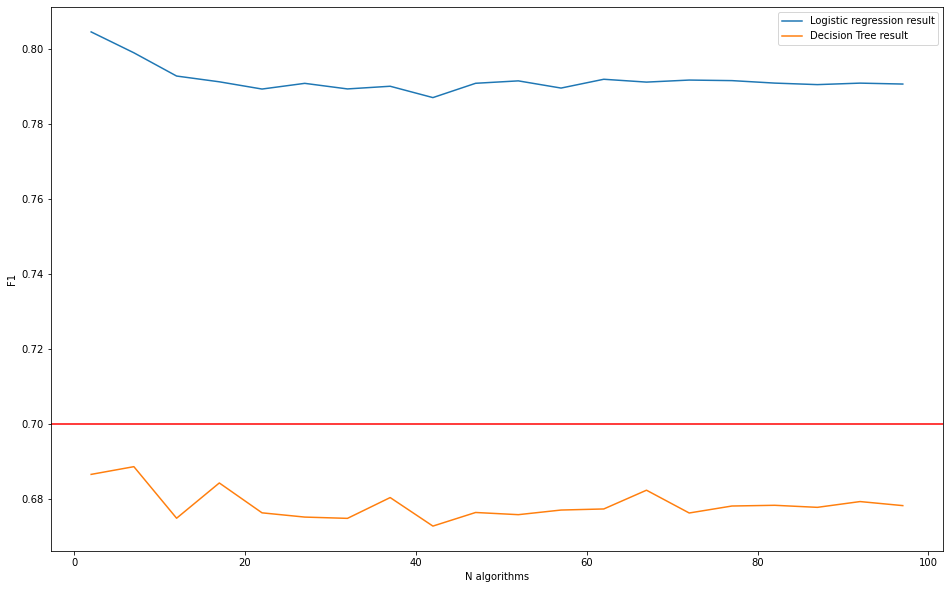

In [456]:
plt.figure(figsize=(16, 10))
plt.plot(np.arange(2, 100, 5), accuracy_log, label='Logistic regression result') 
plt.plot(np.arange(2, 100, 5), accuracy_dtc, label='Decision Tree result')
plt.axhline(y=0.7, xmin=0, xmax=100, color='red')
plt.legend() 
plt.xlabel('N algorithms') 
plt.ylabel('Accuracy')
plt.show()  

plt.figure(figsize=(16, 10))
plt.plot(np.arange(2, 100, 5), f1_log, label='Logistic regression result') 
plt.plot(np.arange(2, 100, 5), f1_dtc, label='Decision Tree result')
plt.axhline(y=0.7, xmin=0, xmax=100, color='red')
plt.legend() 
plt.xlabel('N algorithms') 
plt.ylabel('F1')
plt.show()  

#оптимальное количество алгоритмов - тем больше тем лучше, так как у дерева уменьшается дисперсия,
#так же как и у логистической регрессии.  
#оптимальные параметры для деревьев здесь подбираются для каждого сэмпла практически такие же как и в 2.6
#здесь видно, что дерево не справляется, так как довольно мало данных и признаков, по которым их можно отсортировать

Видно, что у логистической регрессии все стабильно, градиентный спуск работал и до этого хорошо. В начале видно скачок, но скорее это объясняется хорошей сходимостью на одном из алгоритмов. Далее мы наблюдаем плато, что говорит о том, что говорит о уменьшении ошибки. Аналогично для дерева, видим, чем больше алгоритмов, тем график для дерева больше похож на константу. Это и есть хорошо!

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

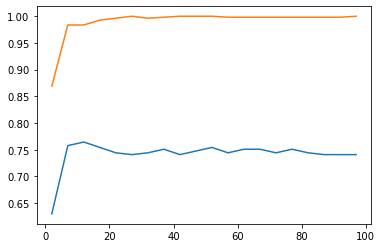

In [459]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
estimators = np.arange(2, 100, 5)  
accuracy = [] 
accuracy_on_train = []
for i in estimators: 
    rand_forest = RandomForestClassifier(n_estimators=i, max_depth=10, random_state=42) 
    rand_forest.fit(X_train_norm, y_train) 
    y_predicted = rand_forest.predict(X_test_norm) 
    y_predicted_on_train = rand_forest.predict(X_train_norm) 
    accuracy.append(accuracy_score(y_test, y_predicted))  
    accuracy_on_train.append(accuracy_score(y_train, y_predicted_on_train))
    
plt.plot(estimators, accuracy) 
plt.plot(estimators, accuracy_on_train) 
#здесь видно, что оптимально взять около 100 алгоритмов 

Здесь также видим, что чем больше алгоритмов, тем лучше мы выходим на плато, то есть ошибка уменьшается при беггинге, соответственно лучше брать как можно больше алгоритмов!

In [460]:
#   2.8. Learning curve
#  Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

#  * Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

#   * Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

#  * Analyse the final plot. Can you make any conlusions using it? 

In [461]:
# YOUR CODE HERE 
train_size = X_train_norm.shape[0] 
batch = int(train_size/10)  
remainder = train_size - 10 * batch
param_log = {'C': np.logspace(-4, 4, 10), 'penalty': ['l1', 'l2']} 
param_dtc = {'max_depth': np.arange(1, 10, 1)} 
param_rfc = {'max_depth': np.arange(1, 10, 1), 'n_estimators': np.arange(2, 100, 5)} 

perm = np.random.permutation(len(X_train_norm))
X_train_curr = X_train_norm[perm][:batch, :] 
y_train_curr = y_train[perm][:batch]  

accuracy_log = np.zeros([10]) 
accuracy_dtc = np.zeros([10]) 
accuracy_rfc = np.zeros([10]) 

f1_log = np.zeros([10])  
f1_dtc = np.zeros([10]) 
f1_rfc = np.zeros([10]) 
for i in range(10):  
    grid_log = GridSearchCV(LogisticRegression(multi_class='multinomial', tol=1e-3, solver='saga', max_iter=1000), 
                            param_log, cv=5) 
    grid_dtc = GridSearchCV(DecisionTreeClassifier(), param_dtc, cv=5)  
    grid_rfc = GridSearchCV(RandomForestClassifier(), param_rfc, cv=5) 
    
    grid_log.fit(X_train_curr, y_train_curr) 
    grid_dtc.fit(X_train_curr, y_train_curr)  
    grid_rfc.fit(X_train_curr, y_train_curr) 
    
    y_log_predicted = grid_log.predict(X_test_norm) 
    y_dtc_predicted = grid_dtc.predict(X_test_norm) 
    y_rfc_predicted = grid_rfc.predict(X_test_norm) 
    
    accuracy_log[i] = accuracy_score(y_test, y_log_predicted) 
    accuracy_dtc[i] = accuracy_score(y_test, y_dtc_predicted)
    accuracy_rfc[i] = accuracy_score(y_test, y_rfc_predicted)  
    
    f1_log[i] = f1_score(y_test, y_log_predicted, average='macro') 
    f1_dtc[i] = f1_score(y_test, y_dtc_predicted, average='macro')
    f1_rfc[i] = f1_score(y_test, y_rfc_predicted, average='macro')   
    
    if(i == 8):  
        X_train_curr = X_train_norm[perm][:(i + 1) * batch + remainder, :] 
        y_train_curr = y_train[perm][:(i + 1) * batch + remainder]  
    else: 
        X_train_curr = X_train_norm[perm][:(i + 1) * batch, :] 
        y_train_curr = y_train[perm][:(i + 1) * batch]  

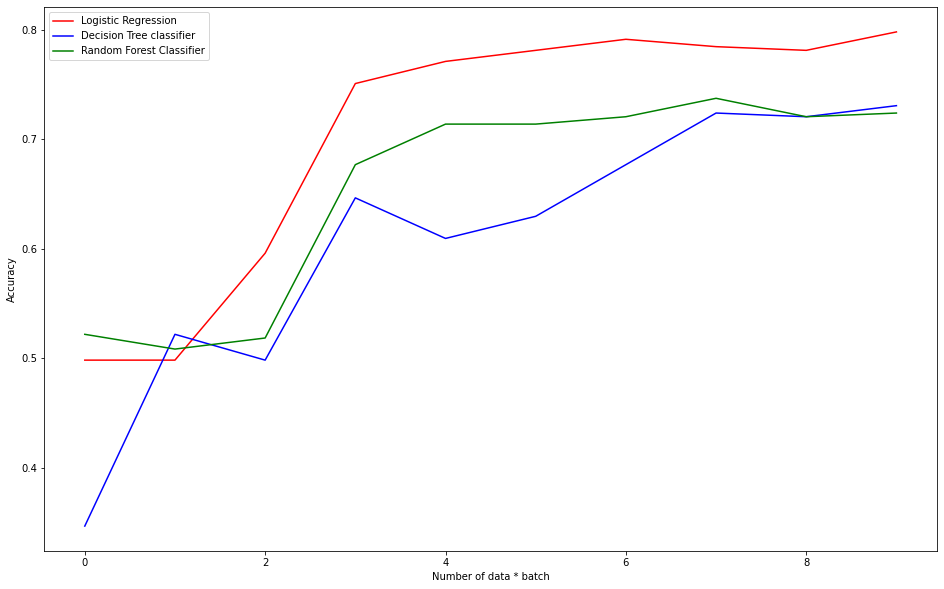

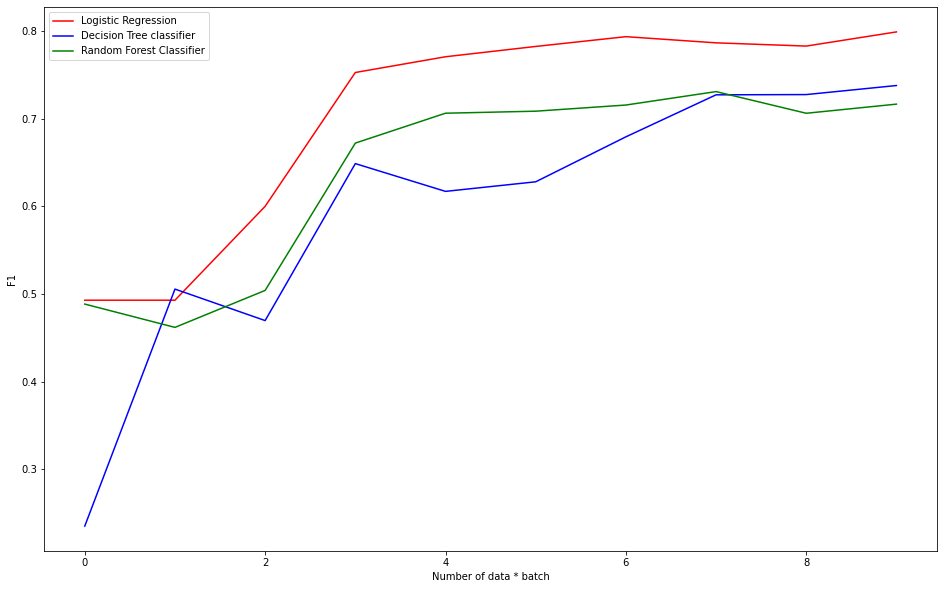

In [462]:
fig=plt.figure(figsize=(16, 10))
plt.plot(np.arange(0, 10), accuracy_log, label='Logistic Regression', color='red') 
plt.plot(np.arange(0, 10), accuracy_dtc, label='Decision Tree classifier', color='blue')  
plt.plot(np.arange(0, 10), accuracy_rfc, label='Random Forest Classifier', color='green') 
plt.xlabel('Number of data * batch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()  

fig=plt.figure(figsize=(16, 10))
plt.plot(np.arange(0, 10), f1_log, label='Logistic Regression', color='red') 
plt.plot(np.arange(0, 10), f1_dtc, label='Decision Tree classifier', color='blue')  
plt.plot(np.arange(0, 10), f1_rfc, label='Random Forest Classifier', color='green') 
plt.xlabel('Number of data * batch') 
plt.ylabel('F1') 
plt.legend() 
plt.show() 

Видно, что логистическа регрессия растет в своей точности, так как чем больше данных тем для нее лучше, так как там работает градиентный спуск и для его сходимости лучше, когда больше данных для сходимости. Видно также тенденцию на рост у леса и у дерева, это тоже в принципе понятно, так как для них чем больше данных тем лучше они классифицируют, так как увеличевается глубина дерева, где оно еще не переобучается, но и классифицирует лучше, видно так же, что рандомный лес и дерево дает практически один результат, дерево даже лучше, что довольно странно, свяжем это с тем что у нас все же мало данных, глубина дерева сильно ограничена. Наверное отсюда можно сделать, что данные хорошо разделимы, поэтому дерево вырывается вперед!